In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import ticker
# import cv2 

In [2]:
import numpy as np
from matplotlib import ticker, pyplot as plt
import cv2 

# implicita e explicita
existem duas formas de criar figura. Quando usamos pyplot e adicionamos metdos nela é a forma implicita. Criar a figura do zero é a forma explicita (object oriented)

subplots cria dois elementos:
* **fig** --- a janela onde será desenhada
* **ax** --- os eixos onde será plotada a curva

outros parametros interessantes são figsize (que determina o tamanho da janela) e dois numeros (que indicam as subjanelas)

```python
fig, ax = plt.subplots(n_cols, n_rows, figsize=(w,h))
```

<!-- <img src="imgs/anatomy.png" style="width:300px;height:300px"> -->
<img src="imgs/anatomy.png" width="500" height="500"> 

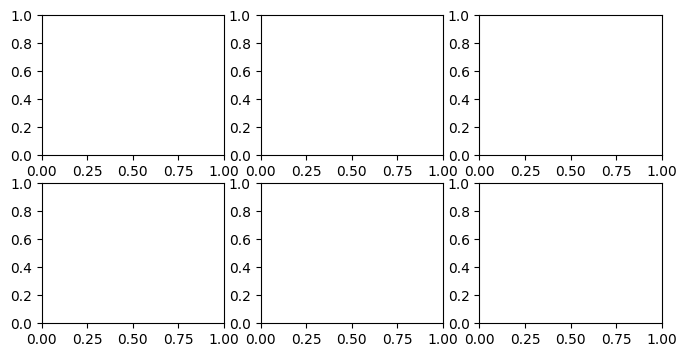

In [3]:
fig, ax = plt.subplots(2,3,figsize=(8,4))
plt.show()

# Subplots mais complexos

type(ax) é um dicionario que tem {key:item}

Figura 1:  (1, <Axes: label='1'>)
Figura 2:  ('canto sup direito', <Axes: label='canto sup direito'>)
Figura 3:  (2, <Axes: label='2'>)
Figura 4:  ('de baixo', <Axes: label='de baixo'>)


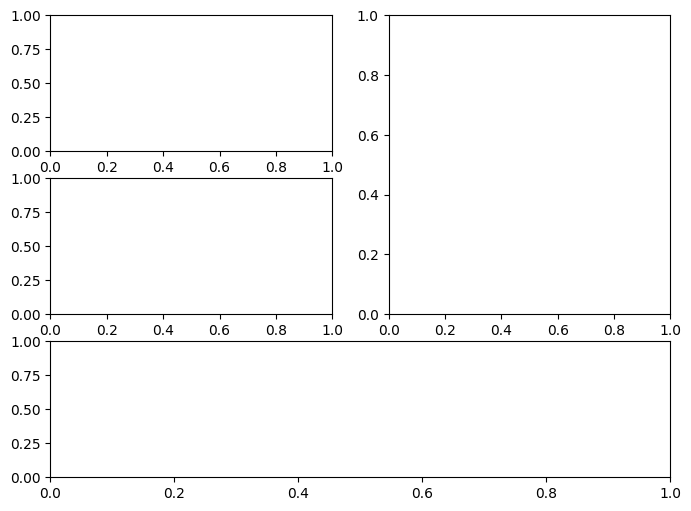

In [4]:
# fig, ax = plt.subplot_mosaic([['A', 'right'], ['B', 'right']])
fig, ax = plt.subplot_mosaic([[1, "canto sup direito"], [2, "canto sup direito"], ["de baixo",'de baixo']], figsize=(8,6))

# podemos imprimir o dicionario dos plots 
for i,j in enumerate(ax.items()):
    print(f"Figura {i+1}: ",j)

In [5]:
# podemos imprimir o dicionario dos plots 
for i,(ax_name, _) in enumerate(ax.items()):
    print(f"Figura {i+1}: ", ax_name)

Figura 1:  1
Figura 2:  canto sup direito
Figura 3:  2
Figura 4:  de baixo


# Axes
Com essas informações em mãos podemos controlar o gráfico
* definir o tamanho com figsize
* definir o titulo
* definir os labels x e y

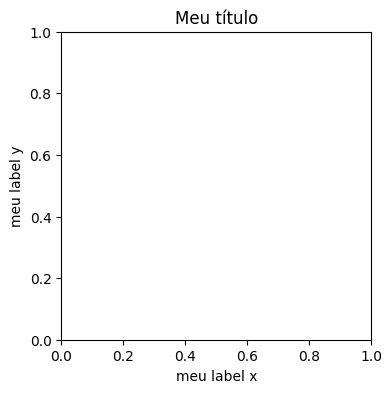

In [6]:
fig, ax = plt.subplots(figsize=(4,4))
ax.set_title('Meu título')
ax.set_xlabel('meu label x')
ax.set_ylabel('meu label y')

plt.show()

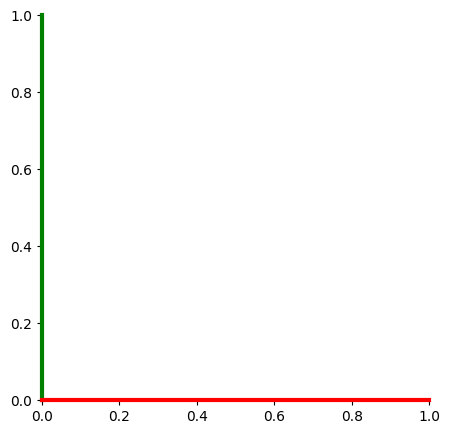

In [7]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

# customizar os spines 
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('red')
ax.spines['left'].set_color('green')
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

# # Colocar a grid
# ax.grid()

# Axis
Nao confundir axis com axes. Axis se refere aos dois eixos: x e y. No caso de figuras 3D ha um terceiro eixo.


# Artist
Tudo que é visível na janel do fig é artist

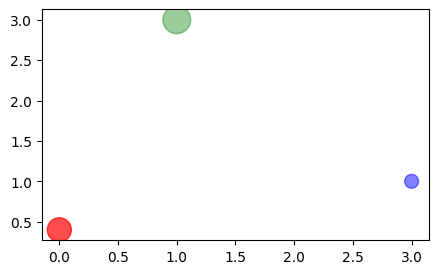

In [8]:
fig, ax = plt.subplots(figsize=(5,3))
ax.scatter([0,1,3], [.4,3,1], s=[300,400,100], color = ['red', 'green', 'blue'], alpha=[.7,.4,.5])
plt.show()

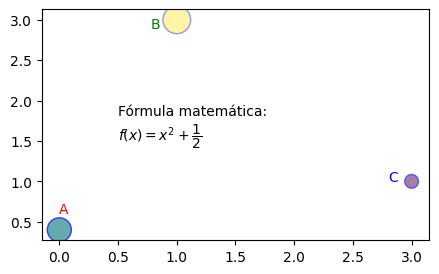

In [9]:
fig, ax = plt.subplots(figsize=(5,3))
ax.scatter([0,1,3], [.4,3,1], s=[300,400,100], c=[34,67,5], alpha=[.7,.4,.5], edgecolors='blue')
ax.text(0,.6, 'A', color='red')
ax.text(.78,2.9, 'B', color='green')
ax.text(2.8,1, 'C', color='blue')
ax.text(.5,1.5, 'Fórmula matemática:\n$f(x)=x^2+\\dfrac{1}{2}$', color='k')
plt.show()
# r"Fórmula matemática:\n$f(x) = x^2 + \frac{1}{2}$"

In [10]:
x=np.linspace(-5, 5, 11)
x1 =np.random.randint(0,9, 20)
y1 =np.random.randint(1,5, 20)
c=np.random.randint(1,4, 20)
s=np.random.randint(2,5,20)*100

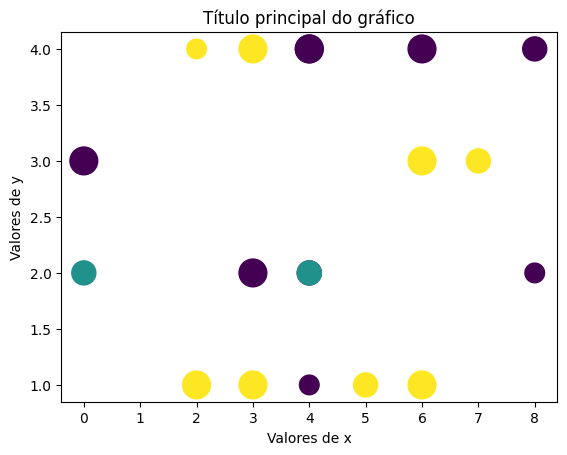

In [11]:
plt.scatter(x1,y1, c=c, s=s)
plt.title("Título principal do gráfico")
plt.xlabel("Valores de x")
plt.ylabel("Valores de y")
plt.show()

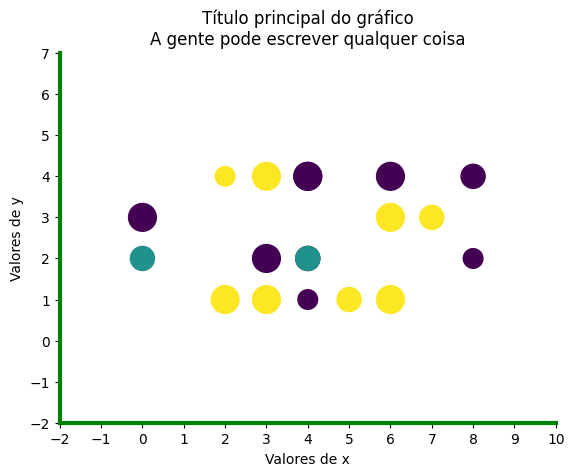

In [12]:
fig, ax = plt.subplots()
ax.scatter(x1,y1, c=c, s=s)
ax.set_xlabel("Valores de x")
ax.set_ylabel("Valores de y")
ax.set_ylim(-2,7)
ax.set_xlim(-2,10)
ax.set_xticks(np.arange(-2,11,1))
ax.set_title("Título principal do gráfico\nA gente pode escrever qualquer coisa")
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_color("green")
ax.spines["left"].set_color("green")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

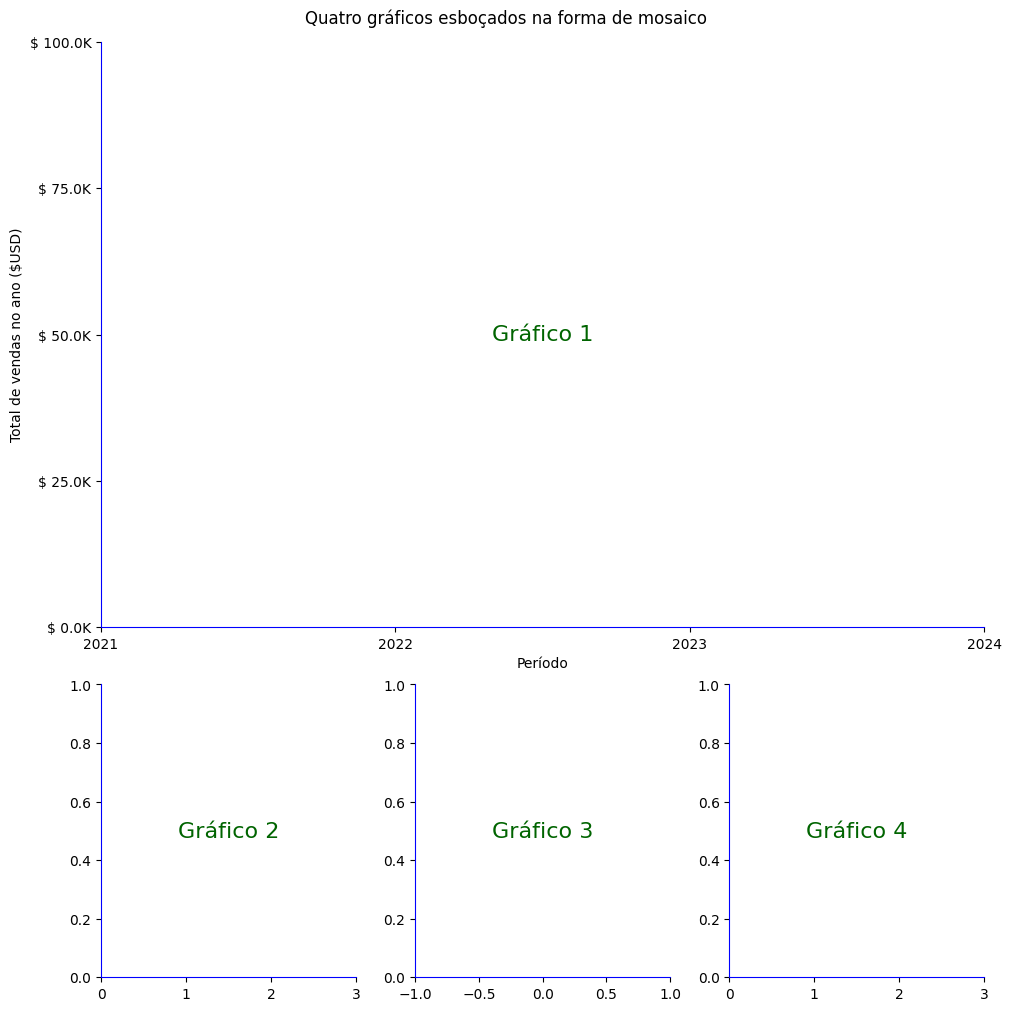

In [13]:
fig, ax = plt.subplot_mosaic(
    [["um", "um", "um"], 
     ["um", "um", "um"], 
     ["dois", "tres", "quatro"]], layout='constrained',
     figsize=(10,10)
    )
fig.suptitle("Quatro gráficos esboçados na forma de mosaico")
# ax["um"].set_title("Gráfico 1")
# ax["dois"].set_title("Gráfico 2")
# ax["tres"].set_title("Gráfico 3")
# ax["quatro"].set_title("Gráfico 4")

ax["um"].set_xlabel("Período")
ax["um"].set_ylabel("Total de vendas no ano ($USD)")
# Definir os xticsk de cada de figura 
xt= np.array([0,.25, .5, .75, 1])*100
ax["um"].set_yticks(xt, labels=[f"\\$ {x}K" for x in xt])
ax["um"].set_xticks([0,1, 2, 3],np.arange('2021', '2025', dtype='datetime64[Y]'))
ax["tres"].set_xticks([-1,0,1], minor=True)

# O ax dois e o ax quatro levam os mesmo xticks
for ax_name in ["dois","quatro"]:
    ax[ax_name].set_xticks(np.arange(0,4,1))

# Anotar o texto em cada gráfico 
for i,item in enumerate(ax.keys(),start=1):
    centerX= (ax[item].get_xticks()[-1]+ax[item].get_xticks()[0])/2
    centerY= (ax[item].get_yticks()[-1]+ax[item].get_yticks()[0])/2
    ax[item].annotate(f'Gráfico {i}',
                      (centerX, centerY),
                      va='center', ha= 'center',
                      color="DarkGreen",
                      fontsize=16
                      )
# remover eixos top e right e mudar acor dos eixos left e bootom para azul 
for ax_item in ax.keys():
    # Remover 
    ax[ax_item].spines[["top", "right"]].set_visible(False)

    # Mudar a cor 
    ax[ax_item].spines[["left", "bottom"]].set_color("Blue")

  
plt.show()

# Mais um mosaico personalizado

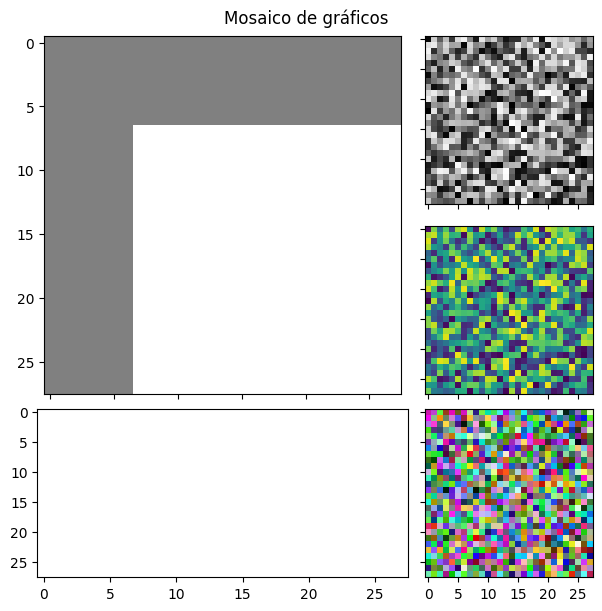

In [14]:
img = cv2.imread("imgs/anatomy.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2=np.random.randint(0,255, size=(28,28))
img3 =np.random.randint(0,255, size=(28,28,3))
fig, ax = plt.subplot_mosaic([
    ["g1", "g1", "g2"],
    ["g1", "g1", "g3"],
    ["g4", "g4", "g5"]], 
    sharex=True, 
    sharey=True, 
    figsize=(6,6), 
    layout='constrained')
ax["g1"].imshow(img)
ax["g2"].imshow(img2, cmap='grey')
ax["g3"].imshow(img2)
ax["g5"].imshow(img3)
fig.suptitle("Mosaico de gráficos")
plt.show()

# Locator Formating
* minor_locator se refere às mínimas graduações do eixo do gráfico.
* major_locator se refere às grandes graduações do eixo do gráfico.

Usamos os ticker para formatar tem que importar do matplotlib

```python
from matplotlib import ticker
```
## Null Locator
Null Locator te apaga todos xaxis ao longo do eixo. Não tem parametros.

## Multiple Locator
Multiple Locator te permite colocar vários xaxis ao longo do eixo. Sintaxe
```Python
ticker.MultipleLocator(base, offset)
```
A base se refere intervalo entre os xaxis, e offset é o incremento

## Fixed Locator
Fixed Locator permite enviar uma lista fixa de float dos valores xaxis. Ele ordena a lista automaticamente se não estiver ordenada 

## Linear locator
Funciona como o `np.arange`. Recebe um numero total de xaxis e tenta espaçar dentro do limite.

Outros sao Index, Auto, Max, Log. Ver documentação.



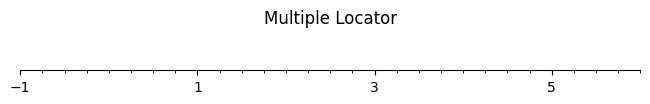

In [15]:
fig, ax = plt.subplots(figsize=(8,.5))
ax.yaxis.set_major_locator(ticker.NullLocator())
ax.spines[["top", "left", "right"]].set_visible(False)
ax.set_title("Multiple Locator")
ax.set_xlim(-1,6)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2, 1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(.25, 1))

plt.show()

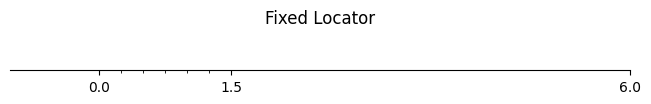

In [16]:
fig, ax = plt.subplots(figsize=(8,.5))
ax.yaxis.set_major_locator(ticker.NullLocator())
ax.spines[["top", "left", "right"]].set_visible(False)
ax.set_title("Fixed Locator")
ax.set_xlim(-1,6)
ax.xaxis.set_major_locator(ticker.FixedLocator([0, 1.5, 6]))
ax.xaxis.set_minor_locator(ticker.FixedLocator([0, .25, .5, .75, 1, 1.25]))

plt.show()

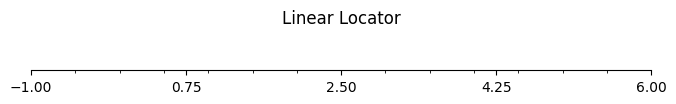

In [17]:
fig, ax = plt.subplots(figsize=(8,.5))
ax.yaxis.set_major_locator(ticker.NullLocator())
ax.spines[["top", "left", "right"]].set_visible(False)
ax.set_title("Linear Locator")
ax.set_xlim(-1,6)
ax.xaxis.set_major_locator(ticker.LinearLocator(5))
ax.xaxis.set_minor_locator(ticker.LinearLocator(15))

plt.show()

## Formater

Podemos formatar o texto do xaxis. Vide a documentação.

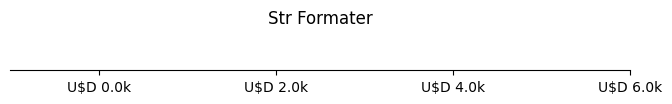

In [18]:
fig, ax = plt.subplots(figsize=(8,.5))
ax.yaxis.set_major_locator(ticker.NullLocator())
ax.spines[["top", "left", "right"]].set_visible(False)
ax.set_title("Str Formater")
ax.set_xlim(-1,6)
ax.xaxis.set_major_locator(ticker.FixedLocator([0,2,4,6]))
# Formatador 
ax.xaxis.set_major_formatter("U$D {x}.0k")

plt.show()

In [19]:
np.arange('2025-08-01', '2025-08-31', dtype='datetime64[D]')

array(['2025-08-01', '2025-08-02', '2025-08-03', '2025-08-04',
       '2025-08-05', '2025-08-06', '2025-08-07', '2025-08-08',
       '2025-08-09', '2025-08-10', '2025-08-11', '2025-08-12',
       '2025-08-13', '2025-08-14', '2025-08-15', '2025-08-16',
       '2025-08-17', '2025-08-18', '2025-08-19', '2025-08-20',
       '2025-08-21', '2025-08-22', '2025-08-23', '2025-08-24',
       '2025-08-25', '2025-08-26', '2025-08-27', '2025-08-28',
       '2025-08-29', '2025-08-30'], dtype='datetime64[D]')

## Arrows and tick parameters

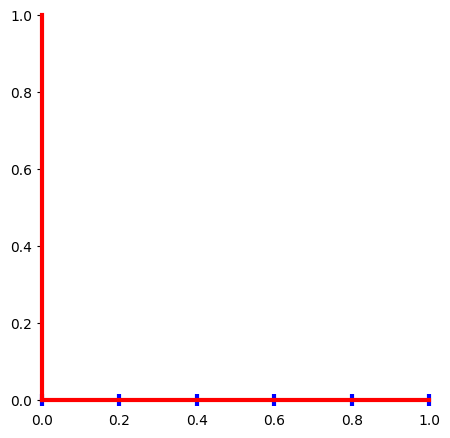

In [20]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

# customizar os spines 
ax.spines[["top","right"]].set_visible(False)
ax.spines[["left","bottom"]].set_color('red')
ax.spines[["left","bottom"]].set_linewidth(3)
ax.tick_params(
    axis='x', color='blue', 
    length=8, width=3,
    direction='inout', 
    pad=6) # se nao destacar o argumento axis ele plota nos dois eixos.

plt.show()


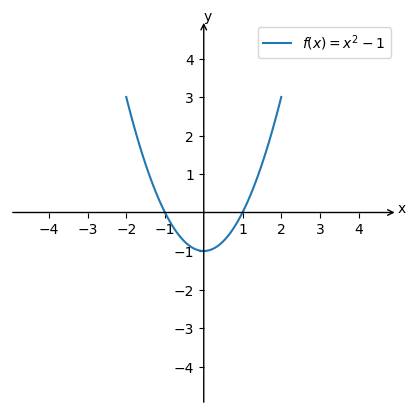

In [30]:
# Variables 
XLIM_LOW, XLIM_HIGH=-5,5
YLIM_LOW, YLIM_HIGH=-5,5

# Datas 
x=np.linspace(-2,2,100)
y=x**2-1

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(x,y, label=r"$f(x)=x^2-1$")

# customizar os spines 
ax.spines[["top","right","left", "bottom"]].set_visible(False)
ax.spines[["left", "bottom"]].set_position('zero')

ax.yaxis.set_major_locator(ticker.FixedLocator([-4, -3, -2, -1, 1,  2,  3,  4,]))
ax.xaxis.set_major_locator(ticker.FixedLocator([-4, -3, -2, -1, 1,  2,  3,  4,]))

ax.set_xlim(XLIM_LOW,XLIM_HIGH)
ax.set_ylim(YLIM_LOW,YLIM_HIGH)
ax.annotate("", xytext=(XLIM_LOW, 0), xy=(XLIM_HIGH, 0), arrowprops=dict(arrowstyle="->")) # Horizontal x
ax.annotate("", xytext=(0, YLIM_LOW), xy=(0, YLIM_HIGH), arrowprops=dict(arrowstyle="->")) # Vertical y
ax.text(XLIM_HIGH, 0, "x")
ax.text(0, YLIM_HIGH, "y")

plt.legend()
plt.show()